In [51]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import requests
import urllib


 1. Построение распределений

Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib. 

(array([0.04213091, 0.10553862, 0.11620051, 0.10060691, 0.06002597,
        0.0280403 , 0.01254064, 0.00361659, 0.00084544, 0.00014091]),
 array([10.05824114, 12.1873195 , 14.31639786, 16.44547622, 18.57455458,
        20.70363294, 22.8327113 , 24.96178966, 27.09086802, 29.21994638,
        31.34902474]),
 <BarContainer object of 10 artists>)

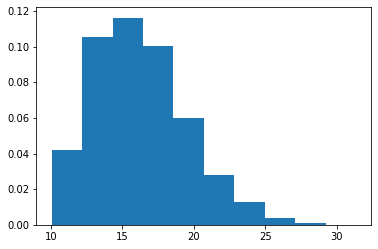

In [48]:
data = stats.rayleigh(loc=10, scale=5)
val = data.rvs(size=10000, random_state=123)
plt.hist(val, density=1, label="Sample")


 2. Построение графика на по функции

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график. 

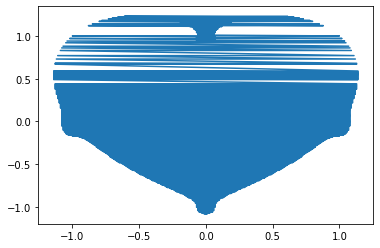

In [49]:
x = np.arange(-1.5,1.5,0.01) #генерирую числа для проверки уравнения
y = np.arange(-1.5,1.5,0.01)
to_print_x = []
to_print_y = []
for yy in y:
    for xx in x:
        xx= round(xx,2)
        yy = round(yy,2)
        if  round((xx**2+yy**2-1)**3 - (xx**2)*(yy**3),2)==0: # ищем точки для графика, которые соответствуют
            to_print_x.append(xx)
            to_print_y.append(yy)
plt.plot(to_print_x,to_print_y)

 3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию. 

In [97]:
url = "https://lhd8ts4trw.a.trbcdn.net/cdn/yusuciqe45/00_data_engineer/dataset_home.txt"
file = urllib.request.urlopen(url)
age, gender, bmi, children, smoker, region, charges = [],[],[],[],[],[],[]
list_value = [age, gender, bmi, children, smoker, region, charges]
for line in file.readlines():
    line = line.decode("UTF_8")
    for num,_ in enumerate(line.split(",")):
        list_value[num].append(_)
age = list(map(int,age))
bmi = list(map(float,bmi))
children = list(map(int,children))
smoker = [1 if y=="yes" else 0 for y in smoker]
gender = [1 if y=="male" else 0 for y in gender]
regiona_dig = []
for reg in region:
    if reg =="northwest":
        regiona_dig.append(0)
    elif reg == "northeast":
        regiona_dig.append(1)
    elif reg == "southwest":
        regiona_dig.append(2)
    elif reg == "southeast":
        regiona_dig.append(3)
charges = list(map(float,charges))
age, gender, bmi, children, smoker, region, charges = np.array(age), np.array(gender), np.array(bmi), np.array(children), np.array(smoker), np.array(region), np.array(charges)

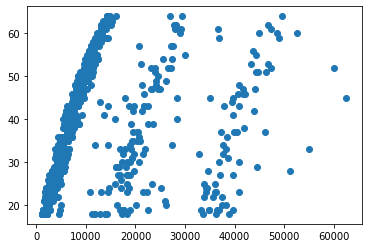

In [101]:
plt.scatter(charges,age)

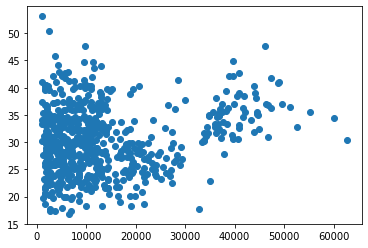

In [102]:
plt.scatter(charges,bmi)

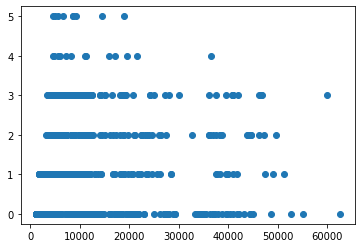

In [103]:
plt.scatter(charges,children)

<BarContainer object of 670 artists>

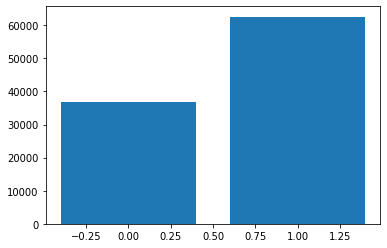

In [104]:
plt.bar(smoker, charges)

(array([278., 188.,  74.,  38.,  19.,  29.,  24.,  15.,   3.,   2.]),
 array([ 1131.5066  ,  7277.643249, 13423.779898, 19569.916547,
        25716.053196, 31862.189845, 38008.326494, 44154.463143,
        50300.599792, 56446.736441, 62592.87309 ]),
 <BarContainer object of 10 artists>)

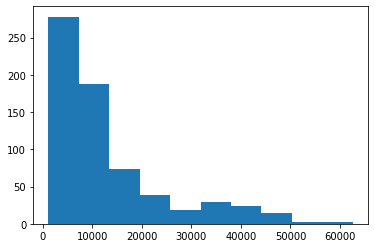

In [105]:
plt.hist(charges)

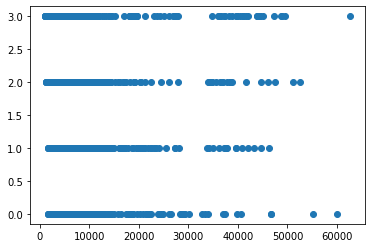

In [113]:
plt.scatter(charges, regiona_dig)

(array([176.,   0.,   0., 161.,   0.,   0., 166.,   0.,   0., 167.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

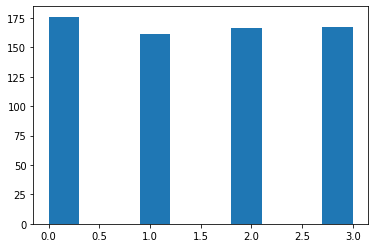

In [114]:
plt.hist(regiona_dig)

(array([291.,   0., 155.,   0., 117.,   0.,  85.,   0.,  13.,   9.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

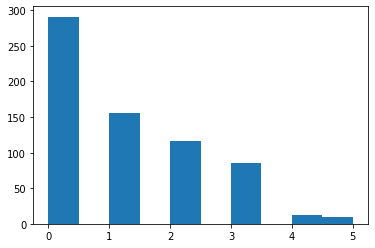

In [115]:
plt.hist(children)

(array([ 27.,  80., 129., 153., 142.,  79.,  44.,  11.,   3.,   2.]),
 array([16.815 , 20.4465, 24.078 , 27.7095, 31.341 , 34.9725, 38.604 ,
        42.2355, 45.867 , 49.4985, 53.13  ]),
 <BarContainer object of 10 artists>)

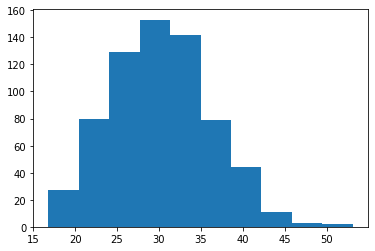

In [116]:
plt.hist(bmi)

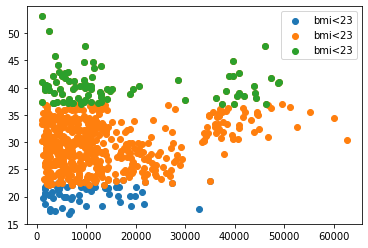

In [124]:
plt.scatter(charges[bmi<23], bmi[bmi<23], label="bmi<23")
plt.scatter(charges[bmi>22], bmi[bmi>22], label="bmi<23")
plt.scatter(charges[bmi>37], bmi[bmi>37], label="bmi<23")
plt.legend()
plt.show()